# Data Handling in Python Workshop | University Research Computing
#### Instructor: Samah Karim | University Research Computing 
#### Date: 12/01/2023

#### Resources:
- [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
- [Parallel Computing on FASRC CANNON Cluster](https://docs.rc.fas.harvard.edu/kb/parallel-computing-on-odyssey/)

## List of Topics
- Python Data Types: Collections
- File I/O
- Parallel Data Processing

### Python Data Types: Collections
#### List Comprehensions

This code is creating a new list by squaring each integer element from the original list.

**%time** is a built-in magic function used to measure the execution time of a single statement or expression. IPython has a set of predefined **magic functions** that you can call with a command line style syntax. There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the % character.

In [1]:
# Build sequences from other sequences

l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

%time res1 = [ x**2 for x in l if isinstance(x, int) ]

print(f"res1 = " + str(res1) + "\n")
# x**2                       :: output expression
# x                          :: variable
# l                          :: input sequence
# if isinstance(x, int)      :: optional predicate


# NOTE: Same results by map, filter, lambda
# lambda(variable : equation, list)

%time res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))

print("res2 = " + str(res2))


print(f"\nres 1 = res2 ?  {res1 == res2}") 
# This uses the f"..." syntax for an f-string, and {res1 == res2} is an expression that will be replaced 
# with the result of the comparison.

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 11.9 µs
res1 = [1, 81, 0, 16, 121, 49]

CPU times: user 11 µs, sys: 1e+03 ns, total: 12 µs
Wall time: 14.8 µs
res2 = [1, 81, 0, 16, 121, 49]

res 1 = res2 ?  True


******
Please Note:   

**Wall time** (real time): This is the actual elapsed time, including time spent waiting for I/O operations, other processes, etc. A clock hanging on a wall outside of the computer would measure X ms from the time the code was submitted to the CPU to the time when the process completed.

**CPU time**: This is the amount of time the CPU spends processing the task. It includes both user and system times.

**User time** and sys time both refer to time taken by the CPU to actually work on the code. The CPU time dedicated to our code is only a fraction of the wall time as the CPU swaps its attention from our code to other processes that are running on the system.

**User time** is the amount of CPU time taken outside of the kernel.

**Sys time** is the amount of time taken inside of the kernel. 

**Total** CPU time is user time + sys time.

********
The **%timeit** magic function in IPython is used to measure the execution time of a Python statement or expression with a higher level of precision than %time. It runs the statement multiple times and provides statistical information about the time it takes to execute. This can be particularly useful for assessing the performance of code and getting a more stable estimate of the execution time.

In [2]:
# %timeit vs %time
l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

%timeit res1 = [ x**2 for x in l if isinstance(x, int) ]
%timeit res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))


2.48 µs ± 134 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.22 µs ± 67.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


********
The **%%time** magic command in IPython is used to measure the execution time of an entire cell, rather than just a single statement or expression. It provides information about the total time taken to run all the code within the cell.

In [3]:
%%time

print("time the whole cell using %%time built-in function")
l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

res1 = [ x**2 for x in l if isinstance(x, int) ]
res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))
print(f"res 1 = res2 ?  {res1 == res2}\n") 

time the whole cell using %%time built-in function
res 1 = res2 ?  True

CPU times: user 976 µs, sys: 1.1 ms, total: 2.07 ms
Wall time: 1.91 ms


********
The **%%prun** magic command in IPython is used to profile the execution of a Python script or code block using the built-in cProfile profiler. Profiling is a technique used to measure the execution time of different parts of your code and identify areas that might benefit from optimization.

In [4]:
%%prun

print("Profile the whole cell using %%prun built-in function")
l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

res1 = [ x**2 for x in l if isinstance(x, int) ]
res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))
print(f"\nres 1 = res2 ?  {res1 == res2}") 

Profile the whole cell using %%prun built-in function

res 1 = res2 ?  True
 

**ncalls** : the number of calls,

**tottime** : the total time spent in the given function (and excluding time made in calls to sub-functions),

**percall** : the quotient of *tottime* divided by *ncalls*

**cumtime** : the total time spent in this and all subfunctions (from invocation till exit). This figure is accurate even for recursive functions.

**percall** is the quotient of *cumtime* divided by primitive calls

**NOTE:** Read more about the built-in magic commands in `IPython` [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html). 
***********


The **%load_ext** magic command in IPython is used to load an IPython extension. IPython extensions are modules that provide additional functionality and features to the IPython environment. These extensions can be developed by the IPython team or the community.

**%snakeviz**: command in IPython is used to profile and visualize the performance of a Python script or code block using the SnakeViz profiler. SnakeViz is a web-based graphical viewer for Python profiling data generated by cProfile, a built-in Python profiling module.

In [5]:
# Load an IPython extension by its module name.
%load_ext snakeviz

In [6]:
def test():
    l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

    res1 = [ x**2 for x in l if isinstance(x, int) ]
    res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))
    print(f"\nres 1 = res2 ?  {res1 == res2}") 

******
When you run this code in an IPython environment, it will generate a visualization using SnakeViz and open it in your web browser. The visualization provides insights into the time spent in various functions and code lines, helping you identify performance bottlenecks.

In [7]:
%snakeviz test()


res 1 = res2 ?  True
 
*** Profile stats marshalled to file '/var/folders/zh/pnw8t7cd3w125crnsf_r8p4m0000gq/T/tmp9isl76wl'. 
Embedding SnakeViz in this document...
<function display at 0x7fec5cf93ca0>


*********

In [8]:
%%time
# Nested Comprehensions
matrix = [ [ 1 if i == row_i else 0 for i in range(0, 10) ] for row_i in range(0, 10) ]
# The above list comprehension creates a 10x10 identity matrix

# List Comprehension using zip() to work with two or more elements at a time
res1 = [(v,w) for v,w in zip([1,2,3], [4,5,6])]

# Using two separate comprehension expressions. This comprehension uses enumerate to get both the index i 
# and the corresponding value v from the list [1, 2, 3]. It then constructs tuples with the elements from the 
# first list (v) and the corresponding elements from the second list [4, 5, 6] using the index i.
res2 = result = [(v, [4, 5, 6][i]) for i, v in enumerate([1, 2, 3])]

print(f"\nres 1 = res2 ?  {res1 == res2}") 



res 1 = res2 ?  True
CPU times: user 300 µs, sys: 129 µs, total: 429 µs
Wall time: 417 µs


**********
#### Set Comprehensions
A set comprehension in Python is a concise way to create a set. The syntax is similar to list comprehensions, but it uses curly braces {} instead of square brackets [].


In Python, a **set** is an unordered collection of unique elements. Sets are defined by enclosing the elements in curly braces {}. Sets are similar to lists or tuples, but unlike lists, they do not have an order, and unlike both lists and tuples, they do not allow duplicate elements.

In [9]:
l = [1, 4, 9, 'aa', 0, 4, 'bb', 5, 5, 'aa', 'bb', 1]
res = {i for i in l}
print(res)

{0, 1, 'bb', 4, 5, 9, 'aa'}


#### Dictionary Comprehensions
Dictionary comprehension is a concise way to create dictionaries in Python. It provides a compact and readable syntax for generating dictionaries in a single line of code. The basic structure of a dictionary comprehension is similar to a list comprehension, but it uses curly braces {} to denote the creation of a dictionary.

In [10]:
# Get frequency of keys and ignore lowercase/uppercase
d = {'b':20, 'c': 40, 'B': 50, 'Z':30}

d_freq = { i.lower() : d.get(i.lower(), 0) + d.get(i.upper(), 0) for i in d.keys() }
# A dictionary comprehension is used to create a new dictionary (d_freq) that contains the frequency of keys, 
# considering both lowercase and uppercase keys as the same. 

print(d)
print(d_freq)

{'b': 20, 'c': 40, 'B': 50, 'Z': 30}
{'b': 70, 'c': 40, 'z': 30}


#### Function map()
Returns a map object(which is an iterator) of the results after applying the given function to each item of a given iterable (list, tuple etc.)

In [11]:
def xsq(x):
    return x**2

l1 = [i for i in range(10**5)]

%time list(map(xsq, l1))
%time list(map(lambda x: x**2, l1))


l2 = ['cat', 'dog', 'bird', 'horse']
print(list(map(list,l2)))

CPU times: user 40.5 ms, sys: 2.89 ms, total: 43.4 ms
Wall time: 43 ms
CPU times: user 33.2 ms, sys: 397 µs, total: 33.6 ms
Wall time: 33.7 ms
[['c', 'a', 't'], ['d', 'o', 'g'], ['b', 'i', 'r', 'd'], ['h', 'o', 'r', 's', 'e']]


*****
### Transforming data in DataFrames

In [12]:
# dataframe map
import pandas as pd
#Load the Iris dataset into a pandas DataFrame (df) from a CSV file and removes the 'species' column.
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
del df['species']

#Defining two lambda functions
f = lambda x: x.max() - x.min() # f calculates the range (difference between max and min) for a given Series.
format = lambda x: '%.2f' % x # format formats a number to two decimal places. 

In [13]:
# Using map() function on a Series.
%time print ( pd.Series(map(format, df['sepal_length'])) )  # Apply the format function to each element of the 'sepal_length' Series.

0      5.10
1      4.90
2      4.70
3      4.60
4      5.00
       ... 
145    6.70
146    6.30
147    6.50
148    6.20
149    5.90
Length: 150, dtype: object
CPU times: user 1.66 ms, sys: 212 µs, total: 1.88 ms
Wall time: 1.83 ms


In [14]:
# Using map() on a Series (alternative syntax)
# This line achieves the same result as the previous line but uses the map() function directly on the Series. 
# map works element-wise on a series
%time print( df['sepal_length'].map(format) ) 

0      5.10
1      4.90
2      4.70
3      4.60
4      5.00
       ... 
145    6.70
146    6.30
147    6.50
148    6.20
149    5.90
Name: sepal_length, Length: 150, dtype: object
CPU times: user 1.32 ms, sys: 241 µs, total: 1.56 ms
Wall time: 1.4 ms


In [15]:
# Using applymap() on a DataFrame: 
# This line applies the format function element-wise to the entire DataFrame using the applymap() function. 
# It formats each numeric value in the DataFrame to two decimal places.
%time print ( df.applymap(format) )

    sepal_length sepal_width petal_length petal_width
0           5.10        3.50         1.40        0.20
1           4.90        3.00         1.40        0.20
2           4.70        3.20         1.30        0.20
3           4.60        3.10         1.50        0.20
4           5.00        3.60         1.40        0.20
..           ...         ...          ...         ...
145         6.70        3.00         5.20        2.30
146         6.30        2.50         5.00        1.90
147         6.50        3.00         5.20        2.00
148         6.20        3.40         5.40        2.30
149         5.90        3.00         5.10        1.80

[150 rows x 4 columns]
CPU times: user 5.19 ms, sys: 1.74 ms, total: 6.93 ms
Wall time: 6.4 ms


In [16]:
#  Using apply() on a DataFrame (column-wise). apply() works on row/column wise.
# This line applies the f function column-wise to the DataFrame (axis=0). It calculates the range for each 
# numeric column in the DataFrame.
%time print ( df.apply(f, axis=0) )    # 0: column, 1: row

sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64
CPU times: user 1.79 ms, sys: 337 µs, total: 2.12 ms
Wall time: 2.04 ms


****
#### Example on numpy array

Compare the performance of various methods for applying the square root function (f(x) = sqrt(x)) element-wise to a numpy array.

Output()

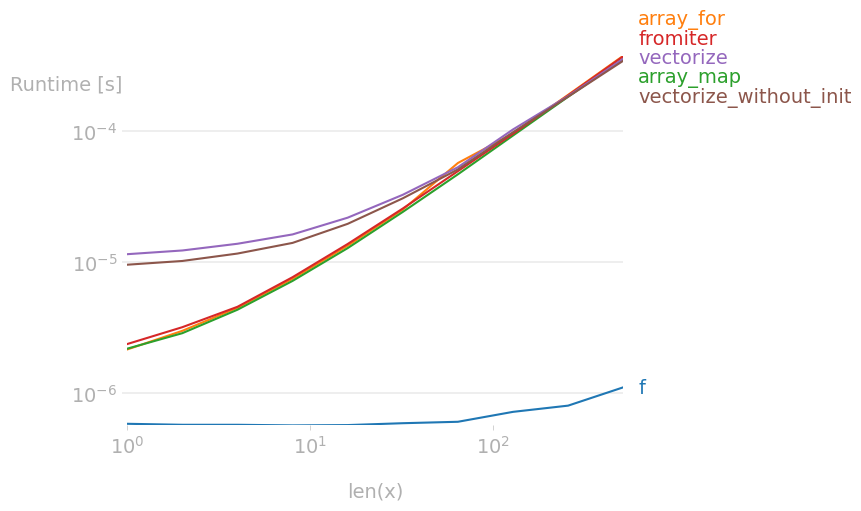

In [17]:
import numpy as np
import perfplot
import math

# Define function to be applied
def f(x):
    # return math.sqrt(x)
    return np.sqrt(x)

# Creates a vectorized version of the function f using np.vectorize. 
# Vectorization allows the function to be applied element-wise to an entire array.
vf = np.vectorize(f)

# Different Approaches to Applying the Function

#Uses a list comprehension to apply the function and then converts the list to a numpy array
def array_for(x):
    return np.array([f(xi) for xi in x])

# Uses the map() function along with a list comprehension to apply the function and then converts the 
# result to a numpy array
def array_map(x):
    return np.array(list(map(f, x)))

# Use np.fromiter to apply the function and create a numpy array
def fromiter(x):
    return np.fromiter((f(xi) for xi in x), x.dtype)

# Use np.vectorize function directly
def vectorize(x):
    return np.vectorize(f)(x)

# Use the vectorized function (vf) without initializing it explicitly
def vectorize_without_init(x):
    return vf(x)

# Use the perfplot library to create a performance plot comparing different approaches
perfplot.show(
    setup=lambda n: np.random.rand(n),
    n_range=[2 ** k for k in range(10)],
    kernels=[f, array_for, array_map, fromiter, vectorize, vectorize_without_init],
    xlabel="len(x)",
)

********
#### Iterators & Generators

An iterator in Python is an object commonly used to iterate over the elements of a collection. It is an object that implements the iterator protocol, which consists of the methods __iter__() and __next__(). The __iter__() method returns the iterator object itself, and the __next__() method returns the next element from the iterator. 

Generators are a specific type of iterator. They are often used to represent sequences of values or elements, and they can be used to iterate over collections in a memory-efficient manner.

In [18]:
# Iterators

l = [1, 20, 3, 40, 5, 60]
it = iter(l)

print( next(it) )
print( it.__next__() )

1
20


In [19]:
# Generators
import random
import time

def lot():
    for i in range(4):
        yield random.randint(100, 200)
        time.sleep(2)
        

for r in lot():
       print("Next random number is: %d" %(r))

Next random number is: 195
Next random number is: 154
Next random number is: 127
Next random number is: 118


*********
### I/O Operation
We want efficiency and flexibility in I/O operations!
- Pickle (serialized storage)
- I/O on Text
- SQL Database
- PyTables I/O Operations

#### Pickle :: Serialized storage

In [20]:
# pickle module serializes the python object for faster r/w.
import pickle
import numpy as np
from random import gauss

# Generates a list containing one million random numbers drawn from a Gaussian distribution with mean 1.5 and standard deviation 2.
dat1 = [gauss(1.5, 2) for i in range(1000000)]

file = open("ser_data.pkl", 'wb')

# Data variable is serialized to a "byte stream" and dumped to disk
%time pickle.dump(dat1, file)

# Retrieving deserialized data from pickle file
%time dat2 = pickle.load(open( "ser_data.pkl", "rb" ))

# Comparing Original and Deserialized Data
np.allclose(np.array(dat1), np.array(dat2), rtol=1e-05, atol=1e-08)  # relative / absolute

CPU times: user 18.4 ms, sys: 4.57 ms, total: 23 ms
Wall time: 23 ms
CPU times: user 27.5 ms, sys: 15.6 ms, total: 43 ms
Wall time: 43.5 ms


True

In [21]:
%%time
# Writing Data to a Non-Pickled Text File
with open('nonser_data.dat', 'w') as f:
    for item in dat1:
        f.write("%s\n" % item)

CPU times: user 948 ms, sys: 24.5 ms, total: 972 ms
Wall time: 977 ms


#### I/O on Text
Pandas library is preferred over built-in Python commands for text data processing.  
Formats: JSON, SQL, CSV, XLS/XLSX, HTML

In [22]:
import pandas as pd
# Reading a CSV file from a URL loading the Iris dataset into a pandas DataFrame (df) 
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

# Writing the DataFrame to a CSV file
%time df.to_csv('csvdata.csv')

# Reading the CSV file back into a DataFrame from the disk
%time dat3 = pd.read_csv('csvdata.csv')

CPU times: user 2.15 ms, sys: 1.34 ms, total: 3.5 ms
Wall time: 7.24 ms
CPU times: user 1.86 ms, sys: 263 µs, total: 2.12 ms
Wall time: 2.1 ms


#### SQL Database
Python supports both SQL and NoSQL databases. It support SQL through its SQLite3.

In [23]:
import sqlite3 as sq

# This code is creating a SQLite database (test_sqldb.db) and a table named TEST_TABLE within that database. 
# The table has three columns, N1, N2, and N3, each of which can store real (floating-point) numbers.

# Creating table
query = 'CREATE TABLE TEST_TABLE (N1 real, N2 real, N3 real)'

# Connecting to the SQLite Database
con = sq.connect('test_sqldb.db')

# Executing the Query and Committing the Transaction
con.execute(query)

# Commits the transaction, making the changes permanent in the database. This step is essential 
# to ensure that the inserted data is saved.
con.commit()

This code snippet is using SQLite to insert a large amount of randomly generated data into the previously created table TEST_TABLE within an SQLite database. 

In [24]:
%%time

# Saving data 

# Generating Random Data
data = np.random.standard_normal((1000000, 3))

#  Using the executemany() method to execute multiple SQL INSERT statements in a single call. 
# The SQL query 'INSERT INTO TEST_TABLE VALUES (?, ?, ?)' specifies the structure of the insert statement, 
# and the data array provides the values to be inserted into the respective columns.
con.executemany('INSERT INTO TEST_TABLE VALUES (?, ?, ?)', data)

# Committing the transaction
con.commit()

CPU times: user 2.17 s, sys: 60.2 ms, total: 2.23 s
Wall time: 2.24 s


The purpose of this code block is to measure the time it takes to retrieve the result of a query that selects all columns from the TEST_TABLE. Notice that the reading operation (selecting and fetching) is faster than the writing operation (inserting) performed in the previous code block.

In [25]:
%%time
# Reading data is faster
con.execute('SELECT * FROM TEST_TABLE').fetchall()[0]

CPU times: user 876 ms, sys: 80.3 ms, total: 957 ms
Wall time: 959 ms


(-3.0857981927292535, -1.0862316635787739, -0.25513530182745264)


This code snippet is using SQLite to execute a SQL query (SELECT * FROM TEST_TABLE WHERE N1 > 0 AND N2 < 0), fetching the result, converting it to a NumPy array, rounding the values to three decimal places, and then accessing the first row of the result. 

In [26]:
%%time
# Save directly to Numpy
np_query = 'SELECT * FROM TEST_TABLE WHERE N1 > 0 AND N2 < 0'

# Fetching and Converting to NumPy Array. Rounding all values to three decimal places. 
# Accessing the First Row.
np.array(con.execute(np_query).fetchall()).round(3)[0]

CPU times: user 328 ms, sys: 33.9 ms, total: 362 ms
Wall time: 362 ms


array([ 1.223, -0.543, -0.043])

This code snippet demonstrates loading data from an SQLite database table (TEST_TABLE) into a Pandas DataFrame, performing a data selection operation using Pandas, and measuring the time it takes for this operation. 

In [27]:
# load data directly to Pandas DataFrame
import pandas.io.sql as pds
df = pds.read_sql('SELECT * FROM TEST_TABLE', con)

#Performing a Data Selection Operation: Uses Pandas DataFrame operations to filter the data, 
# selecting rows where the value in column N1 is greater than 0 and the value in column N2 is less than 0. 
# The .head() method is then used to display the first few rows of the resulting DataFrame.
# Much faster with Pandas in-memory processing
%time df[(df['N1'] > 0) & (df['N2'] < 0)].head()

# NOTE: Pandas CANNOT completely replaces SQL.

CPU times: user 11.9 ms, sys: 6.14 ms, total: 18.1 ms
Wall time: 19 ms


,N1,N2,N3
3,1.223154,-0.543064,-0.043246
17,0.148145,-1.245550,-1.357123
21,0.989934,-0.396133,-1.343812
33,1.069949,-0.373009,-0.377565
34,0.355769,-0.323142,-1.077861


While Pandas provides powerful in-memory data manipulation and analysis capabilities, SQL databases still play a crucial role in data storage, retrieval, and complex querying. While Pandas can handle a wide range of operations, databases are optimized for efficient data storage and retrieval, especially when dealing with large datasets.

In summary, this code showcases the convenience of using Pandas to load data from an SQLite database into a DataFrame and perform data manipulation operations, with a focus on the speed and simplicity of these operations.

*******
#### PyTables I/O Operations
**PyTables** is an open-source Python library that provides a high-performance, easy-to-use interface for managing and analyzing large datasets. It is particularly well-suited for working with large numerical datasets and is built on top of the HDF5 (Hierarchical Data Format version 5) file format.

**HDF5** (Hierarchical Data Format version 5) is a file format and set of tools for managing complex data.

In [28]:
import tables as tb

# Specify File Name and Open HDF5 File
file = 'tab.h5'
h5 = tb.open_file(file, 'w')

# Define Table Structure
# creating rows for the db
rows = 2000000 # Specifies the expected number of rows in the table

# Define the structure of the table. It specifies that the table will have two columns, 'N1' and 'N2', both of integer type (IntCol).
table_model = { 'N1': tb.IntCol(pos=1), 'N2': tb.IntCol(pos=2) }

# Specify filters for the table, such as compression settings. In this case, compression level is set to 0, indicating no compression.
filters = tb.Filters(complevel=0)  # no compression 

# Create Table in HDF5 File
"""
'/': Specifies the location where the table will be created (root in this case).
'ints': Specifies the name of the table.
table_model: Specifies the structure of the table.
title='Integers': Provides a title for the table.
expectedrows=rows: Informs the library about the expected number of rows in the table.
filters=filters: Applies filters to the table (compression settings in this case).
"""
table = h5.create_table('/', 'ints', table_model, title='Integers', expectedrows=rows, filters=filters)

# Print Table Information, including its structure, compression settings, and other details.
print(table)

/ints (Table(0,)) 'Integers'


****
Note:
- '/ints': This indicates the path to the table within the HDF5 file. In this case, the table is located at the root level and is named 'ints'.

- (Table(0,)): This part provides information about the table. It indicates that it is a table (Table) and provides the current number of rows. The (0,) suggests that the table is currently empty, as there are zero rows.

- 'Integers': This is the title of the table, as specified in the title='Integers' parameter when creating the table.
****

In [29]:
%%time
# Populate the previously created table with random integer numbers
ran_int = np.random.randint(0, 10000, size=(rows, 2))

# Create a pointer to the row of the table. This pointer allows you to efficiently insert data into the table row by row.
pointer = table.row              # get a pointer to the Row

# Iterate over each row of the ran_int array
for i in range(rows):
    # Assign the value from the ran_int array to the 'N1' column of the current row pointed to by pointer.
      pointer['N1'] = ran_int[i, 0]
    # Assign the value from the ran_int array to the 'N2' column of the current row pointed to by pointer.
      pointer['N2'] = ran_int[i, 1]
    # Append the data to the table, and move the pointer to the next row.
      pointer.append() 

# Flush the data to the HDF5 file. This is important to ensure that the data is physically written to the file and not just stored in memory.
table.flush()

# Print information about the table, including its structure and the number of rows. 
# Verify that the data has been successfully added to the table.
print(table)

/ints (Table(2000000,)) 'Integers'
CPU times: user 1.33 s, sys: 31.7 ms, total: 1.37 s
Wall time: 1.38 s


***
Instead of manually looping through each row and populating the data in the table, we can create a NumPy structured array with the same structure as the table we intend to create. Then we can create the table using the HDF5 library providing the structed array as the initial data for the table.

In [30]:
%%time

# Using Numpy structured array   :: FASTER
dty = np.dtype([('N1', 'i4'), ('N2', '<i4')])
sarray = np.zeros(len(ran_int), dtype=dty)

h5.create_table('/', 'np_array', sarray, title='Integers', expectedrows=rows, filters=filters)
print(h5)

tab.h5 (File) ''
Last modif.: '2023-11-27T22:52:21+00:00'
Object Tree: 
/ (RootGroup) ''
/ints (Table(2000000,)) 'Integers'
/np_array (Table(2000000,)) 'Integers'

CPU times: user 13.6 ms, sys: 13 ms, total: 26.5 ms
Wall time: 30.1 ms


The key difference is that the second approach leverages the structured nature of NumPy arrays and takes advantage of the HDF5 library's capability to efficiently handle structured data. This results in improved performance, especially when dealing with large datasets.

In summary, the second code block uses a more efficient approach by creating the table directly from a structured array, whereas the first code block manually iterates through the array to populate the table row by row. The structured array approach is often faster and more concise.

In [31]:
# delete duplicate table


# Remove the node (in this case, the table) named 'np_array' from the root of the HDF5 file ('/' specifies the root location).
h5.remove_node('/', 'np_array')
print(h5)

tab.h5 (File) ''
Last modif.: '2023-11-27T23:09:01+00:00'
Object Tree: 
/ (RootGroup) ''
/ints (Table(2000000,)) 'Integers'



Notice we're back to only one table.

In [32]:
# close it before re-opening again
h5.close()

*** 
In the context of working with HDF5 files in Python, it's essential to explicitly close the file after you have finished performing operations on it. Closing the file ensures that any changes made to the file are properly saved, and system resources associated with the file are released.

Here's what happens when you call h5.close():

- Save Changes: If there were any modifications or additions to the file (such as creating or deleting tables), calling close will ensure that these changes are saved.

- Release Resources: Closing the file releases any resources held by the HDF5 library and frees up memory associated with the file.

- Prevent Data Corruption: Closing the file is important for preventing data corruption, especially when dealing with write operations. It ensures that all data buffers are flushed, and the file is properly closed.

After calling close, the file object (h5 in this case) is no longer usable for operations on the file until it is reopened. If you intend to continue working with the file, you would need to reopen it using the appropriate method, such as h5 = tb.open_file(filename, mode) (assuming tb is the alias for the tables module).

**NOTE**: Pandas and PyTables are optimized speed for **I/O** operations.

**Question**: When I should use `SQL databases` over `NumPy ndarray-based` or `pandas DataFrame-based` methods?


The choice between using SQL databases, NumPy ndarray-based methods, or pandas DataFrame-based methods depends on various factors, including the nature of your data, the scale of your data, the type of operations you need to perform, and the specific requirements of your application. Here are some considerations to help you decide:

**Use SQL Databases when:**
- Structured Data and Relationships: SQL databases are designed for managing structured data and handling relationships between tables. If your data has a well-defined structure and you need to enforce relationships between different entities, a relational database can be a good choice.

- ACID Transactions: If your application requires ACID (Atomicity, Consistency, Isolation, Durability) transactions, SQL databases provide a reliable mechanism to ensure data integrity, especially in scenarios where data consistency is critical.

- Concurrency and Multi-User Environments: SQL databases are well-suited for multi-user environments where concurrent access to data is common. They provide mechanisms to handle concurrent transactions and ensure data consistency.

- Scalability: SQL databases can handle large datasets and are designed to scale vertically by adding more resources to a single server or horizontally by sharding or partitioning the data.

**Use NumPy ndarray or Pandas DataFrame when:**
- In-Memory Operations: If your data fits comfortably in memory, NumPy ndarrays and pandas DataFrames provide fast, in-memory operations. They are suitable for data manipulation, analysis, and transformation tasks.

- Numerical Computing: NumPy is particularly well-suited for numerical computing, and if your application involves heavy numerical computations, using ndarrays can provide performance benefits.

- Data Exploration and Analysis: Pandas DataFrames are designed for data manipulation and analysis. They provide a convenient and expressive interface for exploring, cleaning, and transforming data.

- Prototyping and Small to Medium-sized Datasets: For quick prototyping or when dealing with relatively small to medium-sized datasets that can fit in memory, NumPy and pandas offer a convenient and efficient way to work with data.



********
### Parallel Processing
Python packages such as Numpy, Scipy and Pandas utilize `OpenMP` to run on multiple CPUs on a shared-memory space.

- **`-N`**: number of Nodes
- **`--ntasks` or `n`**: number of instances of your command being executed (number of MPI ranks for a common cluster)
- **`--cpus-per-task` or `c`**: how many CPU cores each task can use, *${SLURM_CPUS_PER_TASK}*

Parallel Job Categories:
- Fine grained
- Coarse grained
- Embarrassingly Parallel

Terms:
- **MPI**      : multiple CPU cores in same/different nodes working independently and communicating on demand
- **Threads**  : Python libraries using mulithreading :: Numpy, Scipy, Pandas
- **Tasks**    : Processing too many data files :: csv, HDF5

In [139]:
# Get # of CPU cores per task

%env SLURM_CPUS_PER_TASK

UsageError: Environment does not have key: SLURM_CPUS_PER_TASK


In [35]:
import os
from time import time
import numpy as np

print('Using %d processors' % int(os.getenv('SLURM_CPUS_PER_TASK',1)))

nrounds = 5

t_start = time()

for i in range(nrounds):
    a = np.random.random([2000,2000])
    a = a + a.T
    b = np.linalg.pinv(a) # compute (Moore-Penrose) pseudo-inverse of a matrix

t_delta = time() - t_start

print('Seconds taken to invert %d symmetric 2000x2000 matrices: %f' % (nrounds, t_delta))

Using 1 processors
Seconds taken to invert 5 symmetric 2000x2000 matrices: 14.994856


In [36]:
!python python_openmp.py

Using 1 processors
Seconds taken to invert 5 symmetric 2000x2000 matrices: 16.950738


#### Array Job SLURM Script

[More Information](https://docs.rc.fas.harvard.edu/kb/parallel-computing-on-odyssey/)